In [28]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("auto-mpg.data", delim_whitespace=True, header=None)
df.head()

In [29]:
new_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceralation', 'model year','origin', 'carname'] 
df.columns = new_columns

ValueError: Length mismatch: Expected axis has 8 elements, new values have 9 elements

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceralation,model year,origin,carname
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
#drop categorical data as models can only be created using numerical data
df = df.drop(['carname'],axis=1)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceralation,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceralation,model year,origin
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0
405,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceralation  406 non-null    float64
 6   model year    406 non-null    float64
 7   origin        406 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [ ]:
#next step in miltiple regression is to undrstand the correlation ie the target variale and the feature variable
x = df[['cylinders','displacement', 'horsepower', 'weight','acceralation','model year','origin']]
y = df[['mpg']]
df.corr()['mpg'].sort_values(ascending=False)

mpg             1.000000
model year      0.579267
origin          0.563450
acceralation    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

In [ ]:
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceralation,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [ ]:
y = df['mpg']
x1 = df [['weight']]
x1 = sm.add_constant(x1)
model =sm.OLS (y, x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          6.02e-102
Time:                        13:22:07   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x2 = df[['model year']]
x2 = sm.add_constant(x2)
model2 = sm.OLS(y, x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.08e-36
Time:                        13:22:07   Log-Likelihood:                -1280.6
No. Observations:                 392   AIC:                             2565.
Df Residuals:                     390   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.0117      6.645    -10.536      0.000     -83.076     -56.947
model year     1.2300      0.087     14.080      0.000       1.058       1.402
==============================================================================
Omnibus:                       21.407   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.843
Skew:                           0.387   Prob(JB):                     0.000363
Kurtosis:                       2.391   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x3 = df[['acceralation']]
x3 = sm.add_constant(x3)
model3 = sm.OLS(y, x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.78e-18
Time:                        13:22:26   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8332      2.048      2.359      0.019       0.806       8.861
acceralation     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x4 = df[['horsepower']]
x4 = sm.add_constant(x4)
model4 = sm.OLS(y, x4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        13:22:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x5 = df[['displacement']]
x5 = sm.add_constant(x5)
model = sm.OLS (y,x5).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.66e-90
Time:                        13:26:06   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x6 = df[['origin']]
x6 = sm.add_constant(x6)
model = sm.OLS (y, x6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     183.1
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.81e-34
Time:                        13:27:52   Log-Likelihood:                -1285.8
No. Observations:                 392   AIC:                             2576.
Df Residuals:                     390   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8120      0.716     20.676      0.000      13.404      16.220
origin         5.4765      0.405     13.531      0.000       4.681       6.272
==============================================================================
Omnibus:                       26.546   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.323
Skew:                           0.678   Prob(JB):                     2.60e-07
Kurtosis:                       3.138   Cond. No.                         4.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x7 = df[['cylinders']]
x7 = sm.add_constant(x7)
model = sm.OLS (y,x7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        13:29:18   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     390   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9155      0.835     51.404      0.000      41.274      44.557
cylinders     -3.5581      0.146    -24.425      0.000      -3.844      -3.272
==============================================================================
Omnibus:                       38.938   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.615
Skew:                           0.699   Prob(JB):                     1.38e-12
Kurtosis:                       4.179   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x8 = df[['cylinders','displacement'	,'horsepower',	'weight','acceralation',	'model year','origin' ]]
x8 = sm.add_constant(x8)
model5 = sm.OLS(y, x8).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        13:23:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceralation     0.0806      0.099      0.815      0.415      -0.114       0.275
model year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

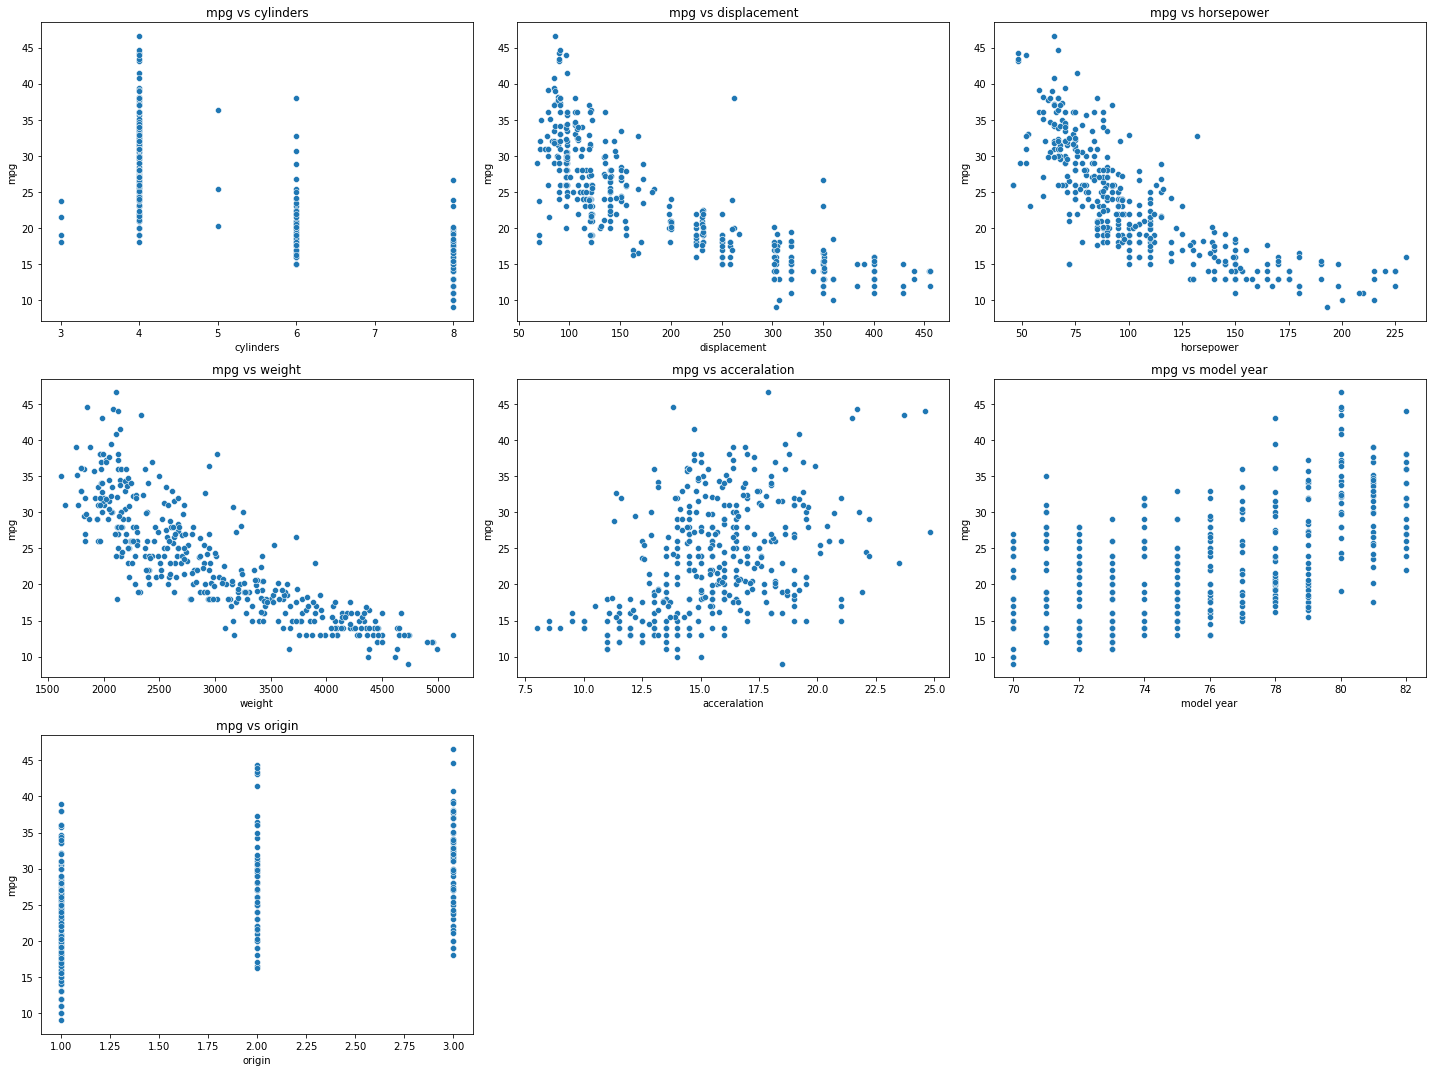

In [ ]:
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceralation', 'model year', 'origin']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through predictors and create a subplot for each
for i, col in enumerate(predictors):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x=col, y='mpg')
    plt.title(f'mpg vs {col}')
    plt.xlabel(col)
    plt.ylabel('mpg')

plt.tight_layout()
plt.show()

In [32]:
# the columns weight, displacement, cylinders, horsepower, acceralation exhibit high level of 
# multicollinearlity ( i.e more cylinders probably mean more horse power which also means more speed probably more weight too)
# in that case therefore chosing the on with highest effect on mpg and dropping the rest 
# is the right thing to do. choosing weight in this case as 69% of variation in mpg is by weight
# the new model will include variables weight, origin and model year as these have the least multicollinearlity

x9 = df[['weight','origin', 'model year']]
x9 = sm.add_constant(x9)
model = sm.OLS(y, x9).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          7.26e-143
Time:                        14:04:24   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0459      4.001     -4.510      0.000     -25.913     -10.179
weight        -0.0060      0.000    -23.588      0.000      -0.006      -0.005
origin         1.1504      0.259      4.439      0.000       0.641       1.660
model year     0.7571      0.048     15.668      0.000       0.662       0.852
==============================================================================
Omnibus:                       39.172   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.003
Skew:                           0.577   Prob(JB):                     3.13e-17
Kurtosis:                       4.823   Cond. No.                     7.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

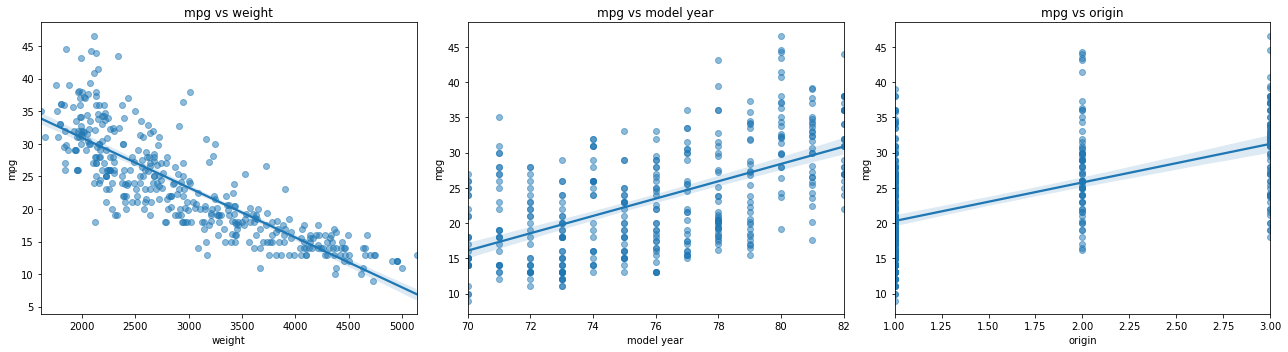

In [33]:
predictors = ['weight', 'model year', 'origin']

plt.figure(figsize=(18, 5))

for i, col in enumerate(predictors):
    plt.subplot(1, 3, i+1)
    sns.regplot(data=df, x=col, y='mpg', scatter_kws={'alpha':0.5})
    plt.title(f'mpg vs {col}')
    
plt.tight_layout()
plt.show()